<a href="https://colab.research.google.com/github/MadhumithaBoopathi/Codsoft/blob/main/Neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training model...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 38ms/step - accuracy: 0.9139 - loss: 0.2796 - val_accuracy: 0.9792 - val_loss: 0.0637
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 30ms/step - accuracy: 0.9866 - loss: 0.0423 - val_accuracy: 0.9884 - val_loss: 0.0355
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9911 - loss: 0.0280 - val_accuracy: 0.9850 - val_loss: 0.0470
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9943 - loss: 0.0175 - val_accuracy: 0.9912 - val_loss: 0.0255
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.9959 - loss: 0.0132 - val_accuracy: 0.9875 - val_loss: 0.0416



Model saved!

Draw a digit (0-9) in the next step...


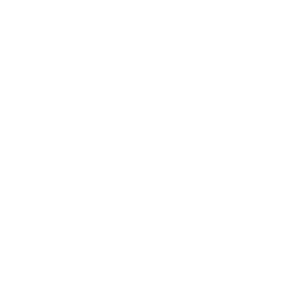


Use a simple drawing tool (like Paint) to create a black digit on a white background.


Saving IMG-20250311-WA0005.jpg to IMG-20250311-WA0005.jpg


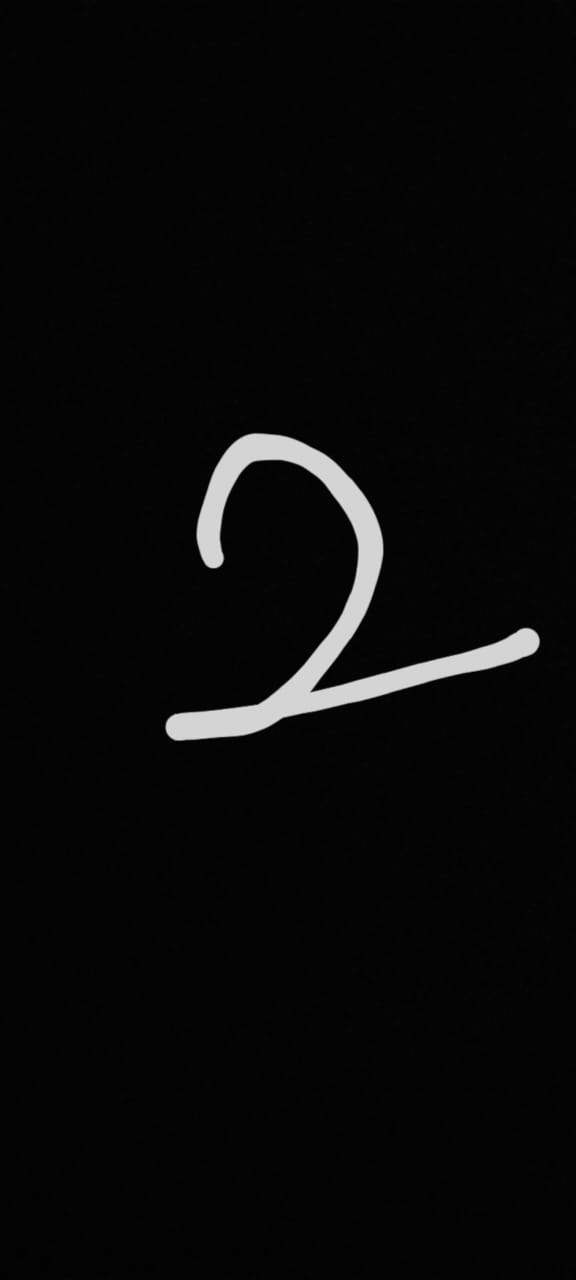

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step

Predicted digit: 2


In [ ]:
# Step 1: Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

# Step 2: Load MNIST dataset (handwritten digits)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Step 3: Preprocess data (normalize & reshape)
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize
x_train = x_train.reshape(-1, 28, 28, 1)  # Reshape for CNN
x_test = x_test.reshape(-1, 28, 28, 1)

# Step 4: Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer (10 digits)
])

# Step 5: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 6: Train the model
print("\nTraining model...")
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Step 7: Save the trained model
model.save("mnist_digit_model.h5")
print("\nModel saved!")

# Step 8: Function to predict a drawn digit
def predict_digit(img):
    img = cv2.resize(img, (28, 28))  # Resize to 28x28 pixels
    img = img / 255.0  # Normalize
    img = img.reshape(1, 28, 28, 1)  # Reshape for CNN
    prediction = model.predict(img)
    return np.argmax(prediction)  # Get the predicted digit

# Step 9: Draw a digit & predict it
print("\nDraw a digit (0-9) in the next step...")

# Create a blank white canvas for drawing
canvas = np.ones((300, 300), dtype="uint8") * 255
cv2_imshow(canvas)
print("\nUse a simple drawing tool (like Paint) to create a black digit on a white background.")

# Load the drawn image (Manually upload a drawn digit)
from google.colab import files
uploaded = files.upload()
img_name = list(uploaded.keys())[0]

# Step 10: Load and predict the drawn digit
img = cv2.imread(img_name, cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)  # Show the uploaded image

predicted_digit = predict_digit(img)
print(f"\nPredicted digit: {predicted_digit}")